In [1]:
#0301
from tensorflow.python.framework.ops import disable_eager_execution

import tensorflow as tf

print(tf.executing_eagerly())
disable_eager_execution()
print(tf.executing_eagerly())

# Graph construction
a = tf.constant(1)
b = tf.constant(2)
c = a + b  # c= tf.add(a, b)

print(b)
print(c)
tf.compat.v1.enable_v2_behavior

#2 graph execution
sess = tf.compat.v1.Session()
print(sess.run(a))
print(sess.run(b))
print(sess.run(c))
sess.close()



True
False
Tensor("Const_1:0", shape=(), dtype=int32)
Tensor("add:0", shape=(), dtype=int32)
1
2
3


In [1]:
#0302
from tensorflow.python.framework.ops import enable_eager_execution
import tensorflow as tf
# 즉시 실행 모드 설정
enable_eager_execution() #에러 발생시에 런타임->런타임 다시 시작
print(tf.executing_eagerly())
a = tf.constant(1)
b = tf.constant(2)
c = a + b   # c= tf.add(a, b)
print(a)
print(b)
print(c)

print(tf.constant(1).numpy())
a.numpy(), b.numpy(), c.numpy()

True
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
1


(1, 2, 3)

In [2]:
#0303 - 텐서 생성
import tensorflow as tf
#1
a = tf.constant(1)
b = tf.constant([1, 2, 3, 4])
c = tf.constant([[1, 2], [3, 4]])
# (1,2,2) 꺽새 하나 걷어내고 몇 개가 있는지 
d = tf.constant([[[1, 2], [3, 4]]]) # shape을 이해해야 

#2
print(a)
print(a.dtype)
print(a.ndim, b.ndim, c.ndim, d.ndim)
print(a.shape, b.shape, c.shape, d.shape)

#3: indexing, slicing
print(b[0])
print(b[:2])
print(c[0, 0])
print(c[:,0])


tf.Tensor(1, shape=(), dtype=int32)
<dtype: 'int32'>
0 1 2 3
() (4,) (2, 2) (1, 2, 2)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([1 3], shape=(2,), dtype=int32)


In [ ]:
#0304 - 텐서 변수
# 텐서의 rank, type, shape 을 공부해야 - 구글링
import tensorflow as tf
#1
a = tf.Variable(1)
b = tf.Variable([1, 2, 3, 4])
c = tf.Variable([[1, 2], [3, 4]])
d = tf.Variable([[[1, 2], [3, 4]]])
print(a.dtype)
print(a.shape, b.shape, c.shape, d.shape)
 
#2
print(a)
print(a.read_value()) # a.value()
print(a.trainable)

#3: indexing, slicing - 데이터세트에서 훈련 데이터, 검증 데이터 추출 시 사용
print(b[0])
print(b[:2])
print(c[0, 0])
print(c[:,0])

#4: assign(), assign_add(), assign_sub() - 학습한 후에 가중치 변경
print(id(a))
print(a.assign(10)) # a.assign(20, read_value=False) : no return
print(a.assign_add(20))
print(a.assign_sub(10))
print(id(a))


<dtype: 'int32'>
() (4,) (2, 2) (1, 2, 2)
<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=1>
tf.Tensor(1, shape=(), dtype=int32)
True
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([1 3], shape=(2,), dtype=int32)
140168305122896
<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=10>
<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=30>
<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=20>
140168305122896


In [ ]:
#0305 - 텐서 값 초기화
import tensorflow as tf

a = tf.zeros(shape = (2, 3)) # dtype = tf.float32
a
print(a)

b = tf.ones(shape = (2, 3))
print(b)

c = tf.zeros_like(b)
print(c)

d = tf.ones_like(c)
print(d)

w = tf.Variable( d )
print(w)


tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]], shape=(2, 3), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>


In [ ]:
#0306 skip
import tensorflow as tf

a= tf.fill([2, 3], 2.0)
print(a)

b = tf.linspace(0.0, 1.0, 5)
print(b)

c = tf.range(5)
print(c)

d = tf.range(1, 5, 0.5)
print(d)

w = tf.Variable(d)
print(w)


tf.Tensor(
[[2. 2. 2.]
 [2. 2. 2.]], shape=(2, 3), dtype=float32)
tf.Tensor([0.   0.25 0.5  0.75 1.  ], shape=(5,), dtype=float32)
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int32)
tf.Tensor([1.  1.5 2.  2.5 3.  3.5 4.  4.5], shape=(8,), dtype=float32)
<tf.Variable 'Variable:0' shape=(8,) dtype=float32, numpy=array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5], dtype=float32)>


In [ ]:
#0307 - reshape 사용법
import tensorflow as tf
#1
a = tf.range(6) # 1-6 숫자 생성
print(a)

b = tf.reshape(a, shape=(2, 3)) # tf.reshape(a, shape=(-1, 3))
print(b)

c = tf.reshape(b, shape=(-1,))
print(c)

#2
d = tf.transpose(b) # tf.transpose(b, perm=[1, 0])
print(d)


tf.Tensor([0 1 2 3 4 5], shape=(6,), dtype=int32)
tf.Tensor(
[[0 1 2]
 [3 4 5]], shape=(2, 3), dtype=int32)
tf.Tensor([0 1 2 3 4 5], shape=(6,), dtype=int32)
tf.Tensor(
[[0 3]
 [1 4]
 [2 5]], shape=(3, 2), dtype=int32)


In [3]:
#0308 - stack, concat
import tensorflow as tf

#1
a = tf.constant([1, 2])  # [1, 2]
b = tf.constant([3, 4])  # [3, 4]

#2
print(tf.stack([a, b])) # axis = 0
print(tf.stack([a, b], axis = 1)) # axis = 1, column 세로로 묶임
 
#3
print(tf.concat([a, b],axis =0))
a = tf.reshape(a, shape=(1,2))
b = tf.reshape(b, shape=(1,2))
c = tf.concat([a, b],axis =0)
print(c)
 
print(tf.concat([a, b],axis =1))
print(tf.concat([c, b],axis =0))

b = tf.reshape(b, shape=(2,1))
print(b)

print(tf.concat([c, b],axis =1))


tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 3]
 [2 4]], shape=(2, 2), dtype=int32)
tf.Tensor([1 2 3 4], shape=(4,), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
tf.Tensor([[1 2 3 4]], shape=(1, 4), dtype=int32)
tf.Tensor(
[[1 2]
 [3 4]
 [3 4]], shape=(3, 2), dtype=int32)
tf.Tensor(
[[3]
 [4]], shape=(2, 1), dtype=int32)
tf.Tensor(
[[1 2 3]
 [3 4 4]], shape=(2, 3), dtype=int32)


In [ ]:
import tensorflow as tf

x = [1,2]
y = [3,4]
z = [5,6]
print(tf.stack([x,y,z])) # axis = 0
print(tf.stack([x,y,z], axis = 1))

In [ ]:
#0309 - 데이터 전처리에 차원 확장
import tensorflow as tf
#1
a = tf.constant([1, 2])
print(a)

b = tf.expand_dims(a, axis = 0) # 행으로 차원 확장
print(b)

c = tf.expand_dims(a, axis = 1) # 열로 차원 확장
print(c)

d = tf.expand_dims(c, axis = 0)
print(d)

#2
e = tf.squeeze(d) # remove all axes of shape size = 1
print(e)

f = tf.squeeze(d, axis = 2)
print(f)


tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor([[1 2]], shape=(1, 2), dtype=int32)
tf.Tensor(
[[1]
 [2]], shape=(2, 1), dtype=int32)
tf.Tensor(
[[[1]
  [2]]], shape=(1, 2, 1), dtype=int32)
tf.Tensor([1 2], shape=(2,), dtype=int32)
tf.Tensor([[1 2]], shape=(1, 2), dtype=int32)


In [ ]:
#0310
import tensorflow as tf

tf.random.set_seed(1)
a = tf.range(5)
print(tf.random.shuffle(a))
print(tf.random.uniform(shape=(2, 3), minval=0, maxval=1))
print(tf.random.normal(shape=(2,3))) # mean=0, stddev=1
print(tf.random.normal(shape=(2,3), mean=10, stddev=2))
print(tf.random.truncated_normal(shape=(2, 3))) # mean=0, stddev=1

w= tf.Variable(tf.random.truncated_normal(shape=(2, 3)))
print(w)


tf.Tensor([2 0 1 4 3], shape=(5,), dtype=int32)
tf.Tensor(
[[0.51010704 0.44353175 0.4085331 ]
 [0.9924923  0.68866396 0.34584963]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[-0.45701224 -0.40686727  0.72857773]
 [-0.8929778   0.31261146  0.9942925 ]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[13.388033  10.239387   7.6830797]
 [10.345208   8.571008  11.379201 ]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[ 0.6118191   0.49197587  0.8756376 ]
 [-0.6439091   0.94869226 -0.78464967]], shape=(2, 3), dtype=float32)
<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[-1.1771783 , -0.90325946,  0.8419609 ],
       [-0.06870949,  0.33911815, -0.9542566 ]], dtype=float32)>


In [ ]:
#0401
import tensorflow as tf
#1
a = tf.constant([1, 2])
print(a + 1) # tf.add(a, 1), tf.math.add(a, 1)
print(a - 1) # tf.subtract(a, 1), tf.math.subtract(a, 1)
print(a * 2) # tf.multiply(a, 2), tf.math.multiply(a, 2)
print(a / 2) # tf.divide(a, 2), tf.math.divide(a, 2)

#2
b = tf.constant([3, 4])
print(a + b) # tf.add(a, b)
print(a - b) # tf.subtract(a, b)
print(a * b) # tf.multiply(a, b)
print(a / b)  # tf.divide(a, b)

#3
a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([1, 2])
print(a + b) # tf.add(a, b)
print(a - b) # tf.subtract(a, b)
print(a * b) # tf.multiply(a, b)
print(a / b) # tf.divide(a, b)


tf.Tensor([2 3], shape=(2,), dtype=int32)
tf.Tensor([0 1], shape=(2,), dtype=int32)
tf.Tensor([2 4], shape=(2,), dtype=int32)
tf.Tensor([0.5 1. ], shape=(2,), dtype=float64)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor([-2 -2], shape=(2,), dtype=int32)
tf.Tensor([3 8], shape=(2,), dtype=int32)
tf.Tensor([0.33333333 0.5       ], shape=(2,), dtype=float64)
tf.Tensor(
[[2 4]
 [4 6]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[0 0]
 [2 2]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1 4]
 [3 8]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1. 1.]
 [3. 2.]], shape=(2, 2), dtype=float64)


In [ ]:
#0402
import tensorflow as tf
#1
a = tf.reshape(tf.range(12), shape = (3, 4))
print(a)

#2 
print(tf.reduce_min(a))
print(tf.reduce_min(a, axis= 0))
print(tf.reduce_min(a, axis= 1))

#3
print(tf.reduce_max(a))
print(tf.reduce_max(a, axis= 0))
print(tf.reduce_max(a, axis= 1))

#4
print(tf.reduce_sum(a))
print(tf.reduce_sum(a, axis= 0))
print(tf.reduce_sum(a, axis= 1))

#5 - 경사 하강법에서 사용 
# mean 평균
print(tf.reduce_mean(a))
print(tf.reduce_mean(a, axis= 0))
print(tf.reduce_mean(a, axis= 1))

#6
print(tf.reduce_prod(a))
print(tf.reduce_prod(a, axis= 0))
print(tf.reduce_prod(a, axis= 1))

#7 - 학습시에 shuffle 사용
a = tf.reshape(tf.random.shuffle(tf.range(12)), shape = (3, 4))
print(a)
# 학습시에 사용 argmin() 최소값을 갖는 값의 인덱스
print(tf.argmin(a)) #  tf.argmin(a, axis =0)
print(tf.argmin(a, axis =1))
print(tf.argmax(a)) # tf.argmax(a, axis =0)
print(tf.argmax(a, axis =1))

#8- 훈련 데이터 학습에 사용
a = tf.random.shuffle(tf.range(12))
print(a)
print(tf.sort(a)) # direction="ASCENDING"
print(tf.sort(a, direction="DESCENDING"))
# reshape 전처리에 사용
a = tf.reshape(a, shape=(3, 4))
print(a)
print(tf.sort(a)) # tf.sort(a, axis = 1)
print(tf.sort(a, axis = 0))


tf.Tensor(
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]], shape=(3, 4), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor([0 1 2 3], shape=(4,), dtype=int32)
tf.Tensor([0 4 8], shape=(3,), dtype=int32)
tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor([ 8  9 10 11], shape=(4,), dtype=int32)
tf.Tensor([ 3  7 11], shape=(3,), dtype=int32)
tf.Tensor(66, shape=(), dtype=int32)
tf.Tensor([12 15 18 21], shape=(4,), dtype=int32)
tf.Tensor([ 6 22 38], shape=(3,), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor([4 5 6 7], shape=(4,), dtype=int32)
tf.Tensor([1 5 9], shape=(3,), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor([  0  45 120 231], shape=(4,), dtype=int32)
tf.Tensor([   0  840 7920], shape=(3,), dtype=int32)
tf.Tensor(
[[ 1  2  8 10]
 [ 4  9  3  7]
 [ 5  6  0 11]], shape=(3, 4), dtype=int32)
tf.Tensor([0 0 2 1], shape=(4,), dtype=int64)
tf.Tensor([0 2 2], shape=(3,), dtype=int64)
tf.Tensor([2 1 0 2], shape=(4,), dtype=int64)
tf.Tensor([3 1 3], shape=(3,), 

In [ ]:
#0403 - skip
import tensorflow as tf
#1
a = tf.constant([1, 2, 3], dtype=tf.float32)
print(tf.norm(a)) # tf.linalg.norm(a)

#2
A = tf.constant([[1, 2], [3, 4]], dtype=tf.float32)
print(tf.linalg.matrix_transpose(A))

#3
print(tf.linalg.det(A))

B =  tf.linalg.inv(A) 
print(B)
print(tf.matmul(A, B))  # tf.linalg.matmul(A, B)



Tensor("norm/Squeeze:0", shape=(), dtype=float32)
Tensor("matrix_transpose/transpose:0", shape=(2, 2), dtype=float32)
Tensor("MatrixDeterminant:0", shape=(), dtype=float32)
Tensor("MatrixInverse:0", shape=(2, 2), dtype=float32)
Tensor("MatMul:0", shape=(2, 2), dtype=float32)


In [ ]:
#0404 - skip
import tensorflow as tf
#1
A = tf.constant([[1, 4,  1],
	         [1, 6, -1],
		 [2, -1, 2]], dtype=tf.float32)
b = tf.constant([[ 7],
                 [13],
                 [ 5]], dtype=tf.float32)

#2
print(tf.linalg.det(A))

x = tf.matmul(tf.linalg.inv(A), b)
print(x)

#3
def all_close(x, y, tol=1e-5):
#	return tf.reduce_sum(tf.abs(x - y)) < tol
         return tf.reduce_sum(tf.square(x - y)) < tol
print(all_close(tf.matmul(A, x), b))

#4
x = tf.linalg.solve(A, b)
print(x)
print(all_close(tf.matmul(A, x), b))


Tensor("MatrixDeterminant_1:0", shape=(), dtype=float32)
Tensor("MatMul_1:0", shape=(3, 1), dtype=float32)
Tensor("Less:0", shape=(), dtype=bool)
Tensor("MatrixSolve:0", shape=(3, 1), dtype=float32)
Tensor("Less_1:0", shape=(), dtype=bool)


In [ ]:
#0405 - skip
import tensorflow as tf
#1
A = tf.constant([[1, 4,  1],
 	         [1, 6, -1],
		 [2, -1, 2]], dtype=tf.float32)
L_U, p = tf.linalg.lu(A)
print(L_U)
print(p)

#2: make P, L, U
U = tf.linalg.band_part(L_U, 0, -1) # Upper triangular
print(U)

L = tf.linalg.band_part(L_U, -1, 0) # Lower triangular
print(L)
L = tf.linalg.set_diag(L, [1, 1, 1]) # strictly lower triangular part of LU
print(L)

P = tf.gather(tf.eye(3), p)
print(P)

#3: check A= PLU 
#3-1:
print(tf.linalg.lu_reconstruct(L_U, p))

#3-2: calculate directly the same as #3-1
print(tf.matmul(P, tf.matmul(L, U))) # tf.gather(tf.matmul(L, U), p)

#4: solve AX = b using PLUx = b
b = tf.constant([[ 7],
                 [13],
                 [ 5]], dtype=tf.float32)
#4-1:
print(tf.linalg.lu_solve(L_U, p, b))


#4-2: calculate directly the same as #4-1
y = tf.linalg.triangular_solve(L, tf.matmul(tf.transpose(P), b))
print(y)

x = tf.linalg.triangular_solve(U, y, lower=False)
print(x)

#5: stuff: pivots, calulate det(A), rank(A)
D = tf.linalg.diag_part(L_U) # tf.linalg.diag_part(U)
print(D)

rank = tf.math.count_nonzero(D)
print(rank)

det_U = tf.reduce_prod(tf.linalg.diag_part(U)) # tf.linalg.det(U)
print(det_U)

det_L = tf.reduce_prod(tf.linalg.diag_part(L)) # # tf.linalg.det(L)  
print(det_L)

det_P = tf.linalg.det(P)
print(det_P)

det_A = det_P*det_L*det_U # tf.linalg.det(A)
print(det_A)


Tensor("Lu:0", shape=(3, 3), dtype=float32)
Tensor("Lu:1", shape=(3,), dtype=int32)
Tensor("MatrixBandPart:0", shape=(3, 3), dtype=float32)
Tensor("MatrixBandPart_1:0", shape=(3, 3), dtype=float32)
Tensor("set_diag:0", shape=(3, 3), dtype=float32)
Tensor("GatherV2:0", shape=(3, 3), dtype=float32)
Tensor("lu_reconstruct/GatherV2:0", shape=(3, 3), dtype=float32)
Tensor("MatMul_5:0", shape=(3, 3), dtype=float32)
Tensor("lu_solve/triangular_solve_1/MatrixTriangularSolve:0", shape=(3, 1), dtype=float32)
Tensor("triangular_solve/MatrixTriangularSolve:0", shape=(3, 1), dtype=float32)
Tensor("triangular_solve_1/MatrixTriangularSolve:0", shape=(3, 1), dtype=float32)
Tensor("diag_part:0", shape=(3,), dtype=float32)
Tensor("count_nonzero/Sum:0", shape=(), dtype=int64)
Tensor("Prod_3:0", shape=(), dtype=float32)
Tensor("Prod_4:0", shape=(), dtype=float32)
Tensor("MatrixDeterminant_2:0", shape=(), dtype=float32)
Tensor("mul_4:0", shape=(), dtype=float32)


In [ ]:
#0406 - skip
import tensorflow as tf
#1
A = tf.constant([[0, 1],
		 [1, 1],
		 [2, 1]], dtype=tf.float32)
b = tf.constant([[ 6],
                 [ 0],
                 [ 0]], dtype=tf.float32)
At = tf.transpose(A)
C = tf.matmul(At, A)
print(C)

#2
x = tf.linalg.solve(C, tf.matmul(At, b))
print(x)

#3
x2 = tf.matmul(tf.matmul(tf.linalg.inv(C), At), b)
print(x2)

#4
L_U, p = tf.linalg.lu(C)
x3 = tf.linalg.lu_solve(L_U, p, tf.matmul(At, b))
print(x3)

#4 
x4 = tf.linalg.lstsq(A, b)
print(x4)

# draw the line
m, c = x.numpy()[:,0]
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')
plt.scatter(x = A.numpy()[:,0], y = b.numpy())
t = tf.linspace(-1.0, 3.0, num=51)
b1 = m*t + c
plt.plot(t, b1, "b-")
plt.axis([-1, 10, -1, 10])
plt.show()


k=336: f(2.250152587890625)=-6.542968514237657
[f(0), f(9/4), f(-2), f(4)]= [2, -6.54296875, 42, 66]


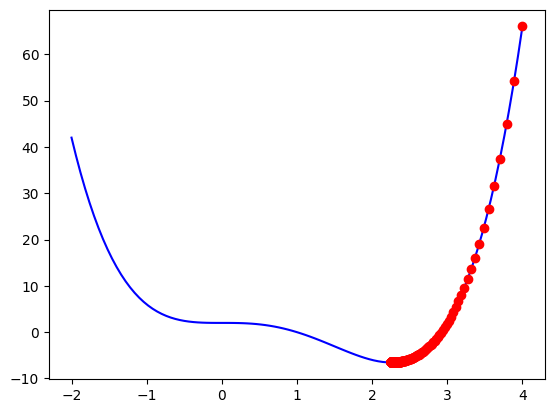

In [4]:
#0407 - 경사하강법
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1
def f(x):
    return x**4 - 3*x**3 +2

def fprime(x): # forward difference
    h = 0.001
    return (f(x+h) - f(x))/h # f'(x) 기울기

#2
k = 0
max_iters = 1000
lr = 0.001 #learning rate 학습률
tol = 1e-5

x_old = 0.0
x_new = 4.0  # -2.0
x_list= [x_new]  # list of x_new
x = tf.Variable(x_new, dtype = tf.float32) # initial value

while abs(x_old-x_new)>tol and  k < max_iters:
    k+=1
    x_old= x.numpy()
    step = lr * fprime(x)
    x.assign_sub(step, read_value=False) # update value by gradient decent method 
    x_new= x.numpy()
    x_list.append(x_new)
##    print('k={}: f({})={}'.format(k, x_new, f(x_new)))
print('k={}: f({})={}'.format(k, x_new, f(x_new))) # final solution

#3: check solutions
print("[f(0), f(9/4), f(-2), f(4)]=", [f(0), f(9/4), f(-2), f(4)])
# [f(0), f(9/4), f(-2), f(4)]: [2, -6.54296875, 42, 66] 

#4: draw graph 
#4-1: graph f(x)
##x_values = np.linspace(-2.0, 4.0, num = 101) # numpy.ndarray
xs = tf.linspace(-2.0, 4.0, num = 101) # Tensor  
ys = f(xs)
plt.plot(xs, ys,  'b-')

#4-2: f(x_new), updated solutions
##x_list =np.array(x_list) # numpy.ndarray
x_list =tf.constant(x_list, dtype=tf.float32)  # Tensor
y_list = f(x_list) 
plt.plot(x_list, y_list, 'ro')
plt.show()
